In [2]:
import pandas as pd   # Importa la biblioteca pandas
import numpy as np    # Importa la biblioteca numpy
import locale # Importa la biblioteca locale para la fecha
import seaborn as sns # Importa la biblioteca seaborn para la visualización de datos
import matplotlib.pyplot as plt # Importa la biblioteca matplotlib para la visualización de datos

# Utilizamos el set_option para ver todas las columnas del fichero
pd.set_option('display.max_columns', None)

# Configura las fechas para español
try:
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
except locale.Error:
    print("Locale 'es_ES.UTF-8' no disponible.")

# Leer el archivo 'bank-additional.csv' y crear el DataFrame
df_c= pd.read_csv('../data/bank-additional.csv', sep=",")
df_c.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [3]:
# Leer el archivo 'customer-details.xlsx' y crear el DataFrame
df_e= pd.read_excel('../data/customer-details.xlsx', sheet_name=None)

# Obtener la primera hoja (en la que quieres agregar la información)
df_combined = df_e[list(df_e.keys())[0]]  # Seleccionamos la primera hoja

# Iterar sobre las otras hojas y concatenar los datos a df_combined
for sheet_name, df in df_e.items():
    if sheet_name != list(df_e.keys())[0]:  # Saltarse la primera hoja
        df_combined = pd.concat([df_combined, df], ignore_index=True)

df_combined.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [4]:
# Realizamos un left join con los dos ficheros utilizando el merge por el campo de cruce id
merged_df = pd.merge(df_combined, df_c, left_on='ID', right_on='id_', how='left')
merged_df.head()

,Unnamed: 0_x,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,Unnamed: 0_y,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,0.0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261.0,1.0,999.0,0.0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,1.0,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149.0,1.0,999.0,0.0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,2.0,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226.0,1.0,999.0,0.0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,3.0,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151.0,1.0,999.0,0.0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,4.0,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307.0,1.0,999.0,0.0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [5]:
def limpiar_datos(df):
    """
    Función para limpiar el DataFrame:
    - Elimina columnas innecesarias
    - Maneja valores nulos
    - Convierte tipos de datos si es necesario
    """
    # 1. Eliminamos las columnas que contienen la palabra 'Unnamed' y la columna 'id_' para que no haya repetidas
    df = df.loc[:, ~df.columns.str.contains('Unnamed')]
    df= df.drop(columns=['id_'])

    # 2. Modificamos el tipo de dato a 'float' las siguientes 3 columnas si existen en el fichero
    if 'cons.price.idx' in df.columns:
        df['cons.price.idx'] = pd.to_numeric(df['cons.price.idx'].str.replace(',', '.'), errors='coerce')
    if 'cons.conf.idx' in df.columns:
        df['cons.conf.idx'] = pd.to_numeric(df['cons.conf.idx'].str.replace(',', '.'), errors='coerce')
    if 'euribor3m' in df.columns:
        df['euribor3m'] = pd.to_numeric(df['euribor3m'].str.replace(',', '.'), errors='coerce')

    # 4. Para las columnas number vamos a ver si hay datos NaN y los cambiamos por un '0'
    for col in df.select_dtypes(include='number'):
        df[col] = df[col].fillna(0)

    # 3. Modificamos el tipo de dato a 'int' de las siguientes 4 columnas si existen en el fichero
    if 'age' in df.columns:
        df['age'] = df['age'].astype(int)
    if 'default' in df.columns:
        df['default'] = df['default'].astype(int)
    if 'housing' in df.columns:
        df['housing'] = df['housing'].astype(int)
    if 'loan' in df.columns:
        df['loan'] = df['loan'].astype(int)
   
    # 5. Convertir la columna 'date' y 'Dt_Customer' de tipo str a tipo datetime
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], format='%d-%B-%Y', errors='coerce')
    elif 'Dt_Customer' in df.columns:
        df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'], format='%d-%B-%Y', errors='coerce')

    # 6. Rellenamos con el valor 'unknown' los valores nulos
    for col in df.select_dtypes(include='object'):
        df[col] = df[col].fillna('unknown')
      
    return df

In [6]:
# Aplicamos la funcion limpiar_datos al df csv
df_m = limpiar_datos(merged_df)
df_m[['date','Dt_Customer']]

,date,Dt_Customer
0,2019-08-02,2012-04-04
1,2016-09-14,2012-12-30
2,2019-02-15,2012-02-02
3,2015-11-29,2012-12-21
4,2017-01-29,2012-06-20
...,...,...
43165,2019-09-23,2014-05-17
43166,2019-11-06,2014-09-29
43167,NaT,2014-10-28
43168,NaT,2014-07-01


In [7]:
def nuevas_columnas(df):
    """
    Función para añadir nuevas columnas al DataFrame
    """
    # 1. Duración del contacto en minutos
    df['contact_duration_minutes'] = round(df['duration'] / 60,2)

    # 2. Extraer mes, año y el año_mes de la fecha de contacto
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['month_year'] = df['date'].dt.to_period('M').astype(str)

    # 3. Rellenar los valores nulos a '0' y convertir la columna 'month' y 'year' a entero y month_year con 'unknown'
    df['month'] = df['month'].fillna(0).astype(int)
    df['year'] = df['year'].fillna(0).astype(int)
    df['month_year'] = df['month_year'].replace('NaT', 'unknown')
    
    # 4. Estación del año (basado en el mes)
    def get_season(month):
        if month < 1:
            return 'unKnown'
        elif month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'

    df['season'] = df['month'].apply(get_season)

    # 5. Crear el grupo de clasificacion de edad
    bins = [0, 25, 35, 45, 60, 100]
    labels = ['Youth', 'Young adults', 'Adults', 'Older adults', 'Elderly']

    # 6. Crear la nueva columna 'age_group' en el DataFrame
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    # 7. Crear el grupo de clasificacion de Ingresos
    df['income_bin'] = pd.cut(df['Income'], bins=5)

    
    return df

In [8]:
# Aplicamos la funcion de creacion de columnas
df_m = nuevas_columnas(df_m)
df_m['income_bin'].unique()


[(145809.8, 180802.0], (75825.4, 110817.6], (110817.6, 145809.8], (40833.2, 75825.4], (5666.039, 40833.2]]
Categories (5, interval[float64, right]): [(5666.039, 40833.2] < (40833.2, 75825.4] < (75825.4, 110817.6] < (110817.6, 145809.8] < (145809.8, 180802.0]]

# **Export fichero limpio**

In [9]:
# Exportamos el ficheros después de su limpieza y creación de variables a csv
df_m.to_csv('../results/archivo_limpio_CSV.csv', index=False) 
# Exportamos el ficheros después de su limpieza y creación de variables a excel
df_m.to_excel('../results/archivo_limpio_EXCEL.xlsx', index=False) 

# **Distribuciones descriptivas**

1. Edad

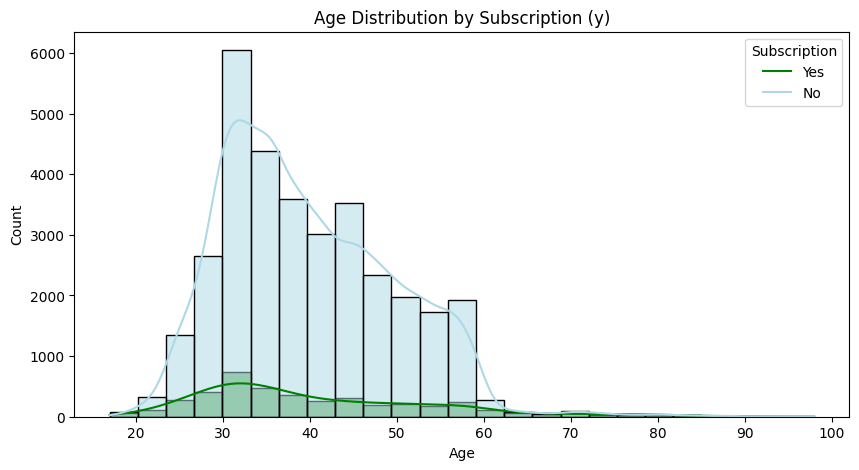

In [10]:
# 1. Histograma donde distribuimos las edades y coloreamos en verde los 'y' que si contrataron
plt.figure(figsize=(10, 5))
sns.histplot(data=df_m[df_m['age'] > 0], x='age', hue='y', bins=25, kde=True,
    palette={'no': "lightblue", 'yes': "green"})

plt.title("Age Distribution by Subscription (y)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Subscription', labels=['Yes', 'No'])
plt.show()

2. Ingresos

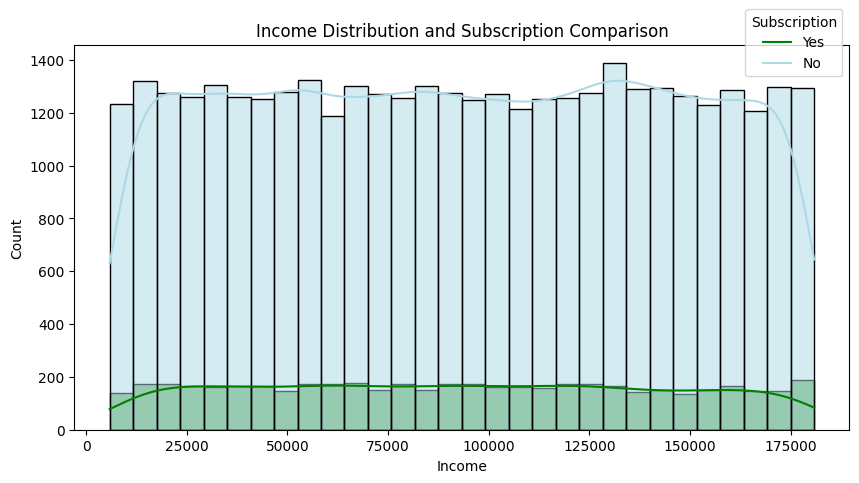

In [11]:
# 1. Histograma donde distribuimos los Ingresos y coloreamos en verde los 'y' que si contrataron
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_m[df_m['y'].isin(['yes', 'no'])], x='Income', hue='y', bins=30, kde=True, palette={'no': 'lightblue', 'yes': "green"})
plt.title('Income Distribution and Subscription Comparison')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Subscription', labels=['Yes', 'No'], loc='upper right', bbox_to_anchor=(1, 1.11))
plt.show()

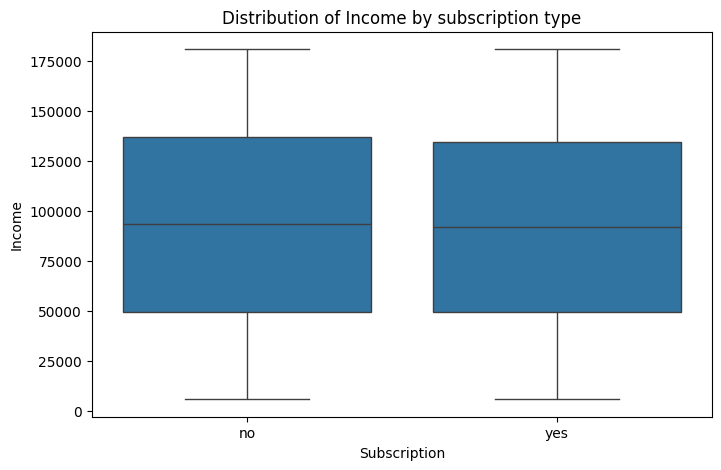

In [12]:
# 2. Boxplot, distribución de los Ingresos según el tipo de suscripción 'y'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_m[df_m['y'].isin(['yes', 'no'])], x='y', y='Income')
plt.title('Distribution of Income by subscription type')
plt.xlabel('Subscription')
plt.ylabel('Income')
plt.show()

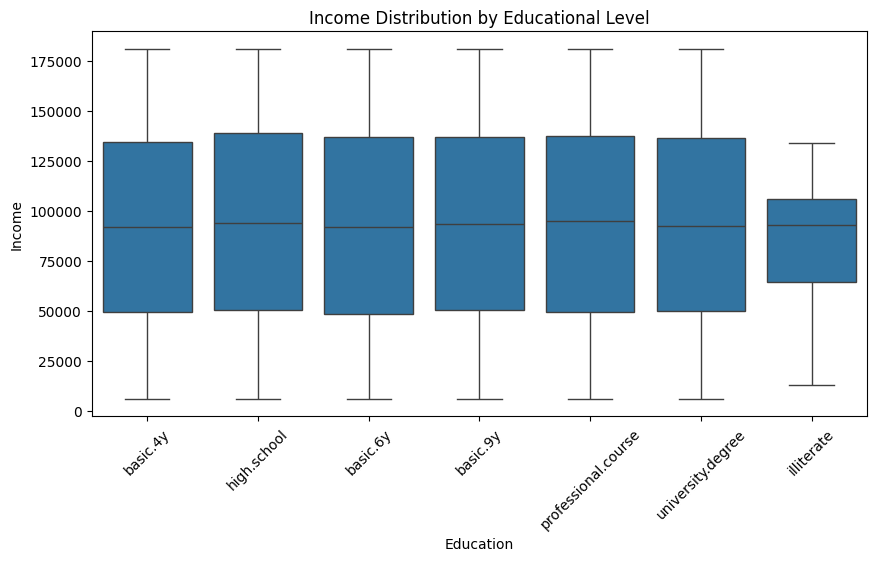

In [13]:
# 3. Boxplot: Para identificar outliers y la distribución de las variables 'Income' y 'education'
plt.figure(figsize=(10,5))  # Para ajustar el tamaño de la figura
sns.boxplot(data=df_m[df_m['education'] != 'unknown'], x='education', y='Income')
plt.title('Income Distribution by Educational Level')  # Opcional: Título para la gráfica
plt.xlabel('Education')  # Opcional: Etiqueta para el eje x
plt.ylabel('Income')  # Opcional: Etiqueta para el eje y
plt.xticks(rotation=45)  # Opcional: Para girar las etiquetas del eje x si son largas
plt.show()

In [14]:
# 4. Análisis media, varianza, minimo, quantiles, maximo de las variables 'education' e 'Income'
round(df_m.groupby('education')['Income'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
basic.4y,4356.0,92337.68,49988.38,5848.0,49445.25,91683.5,134048.00,180753.0
basic.6y,2386.0,92193.84,50819.65,5968.0,48240.50,91552.0,136812.75,180766.0
basic.9y,6309.0,93563.36,50324.07,5913.0,50065.00,93503.0,136770.00,180802.0
high.school,9925.0,94141.96,50874.81,5841.0,50237.00,93913.0,138763.00,180786.0
illiterate,18.0,80480.39,37306.22,13017.0,64089.00,92653.5,105804.50,133597.0
professional.course,5477.0,93669.49,50544.56,5858.0,49299.00,94616.0,137087.00,180791.0
university.degree,12722.0,92738.46,50448.48,5852.0,49599.50,92327.0,136110.25,180787.0
unknown,1977.0,92809.11,50149.05,5929.0,48382.00,92524.0,136025.00,180749.0


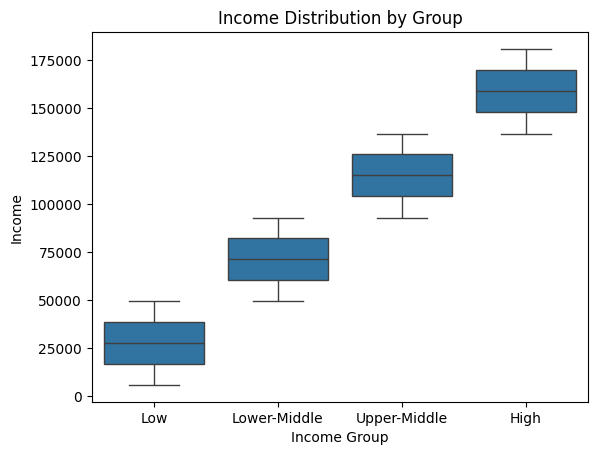

In [15]:
# 5. Boxplot: Analiza la distribucion de la nueva columna Income_group
df_m['Income_group'] = pd.qcut(df_m['Income'], q=4, labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])
sns.boxplot(x='Income_group', y='Income', data=df_m)
plt.title('Income Distribution by Group')
plt.xlabel('Income Group')
plt.ylabel('Income')
plt.show()

3. Contacto en duracion de minutos

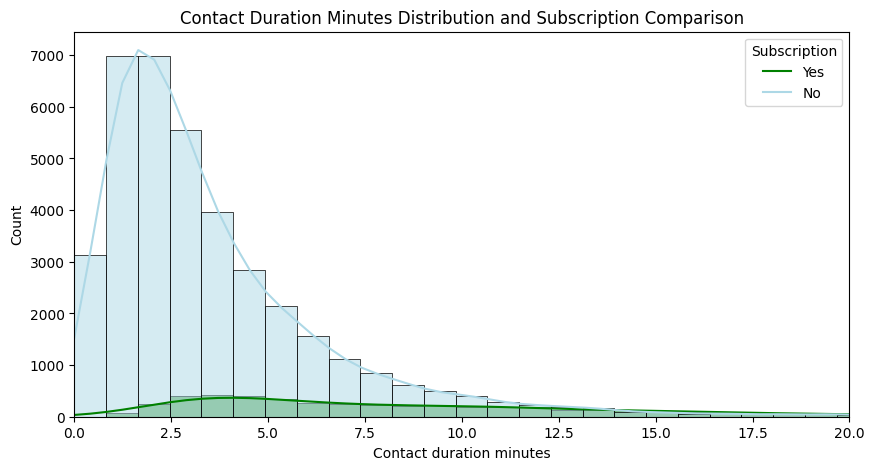

In [16]:
# 1. Histograma donde distribuimos la duracion de contacto en minutos ( < 20 min) y coloreamos en verde los 'y' que si contrataron
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_m[df_m['y'].isin(['yes', 'no'])], x='contact_duration_minutes', hue='y', bins=100, kde=True, palette={'no': 'lightblue', 'yes': "green"})
plt.xlim(0, 20) # Ponemos este tope para que sea mas visual la gráfica
plt.title('Contact Duration Minutes Distribution and Subscription Comparison')
plt.xlabel('Contact duration minutes')
plt.ylabel('Count')
plt.legend(title='Subscription', labels=['Yes', 'No'], loc='upper right')
plt.show()

4. Numero de visitias a la web por mes

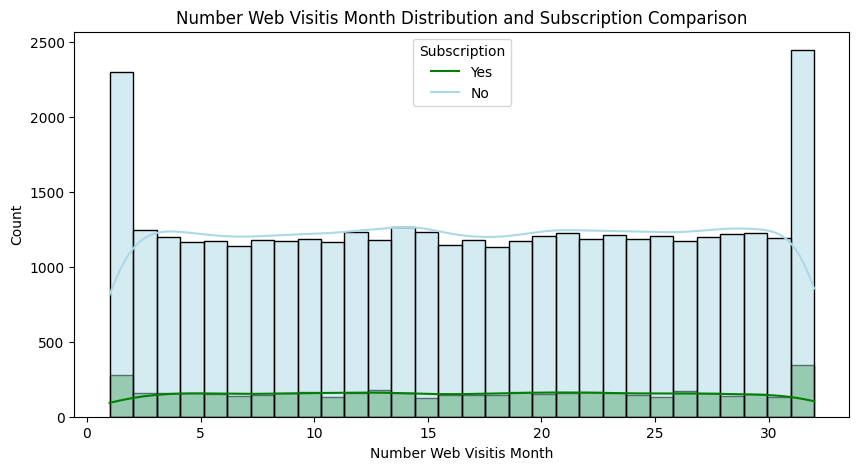

In [17]:
# 1. Histograma donde distribuimos el numero de visitas web mensuales y coloreamos en verde los 'y' que si contrataron
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_m[df_m['y'].isin(['yes', 'no'])], x='NumWebVisitsMonth', hue='y', bins=30, kde=True, palette={'no': 'lightblue', 'yes': "green"})
plt.title('Number Web Visitis Month Distribution and Subscription Comparison')
plt.xlabel('Number Web Visitis Month')
plt.ylabel('Count')
plt.legend(title='Subscription', labels=['Yes', 'No'], loc='upper center')
plt.show()

5. Estado Civil y Trabajo

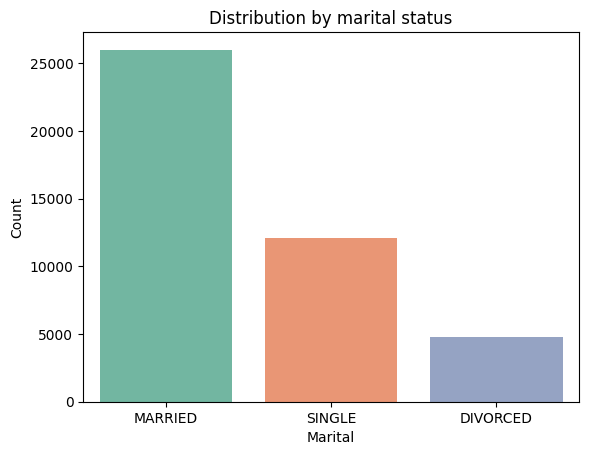

In [18]:
# 1. Countplot: diagrama de dispersión para cada par de variables
# Filtramos los 'unknown'
df_c_marital = df_m[df_m['marital'] != 'unknown']
# Countplot para el estado civil
sns.countplot(x='marital', data=df_c_marital, hue='marital', palette='Set2', legend=False)
plt.title('Distribution by marital status')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.show()

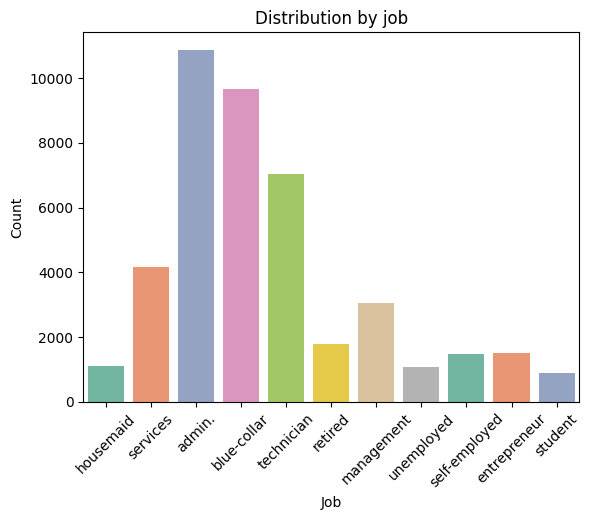

In [19]:
# 2. Countplot para la ocupación
# Filtramos los 'unknown'
df_c_job = df_m[df_m['job'] != 'unknown']

sns.countplot(x='job', data=df_c_job, hue='job', palette='Set2', legend=False)
plt.title('Distribution by job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

# **Analisis por Agrupaciones**

1. Nivel de educacion y grupo de edad


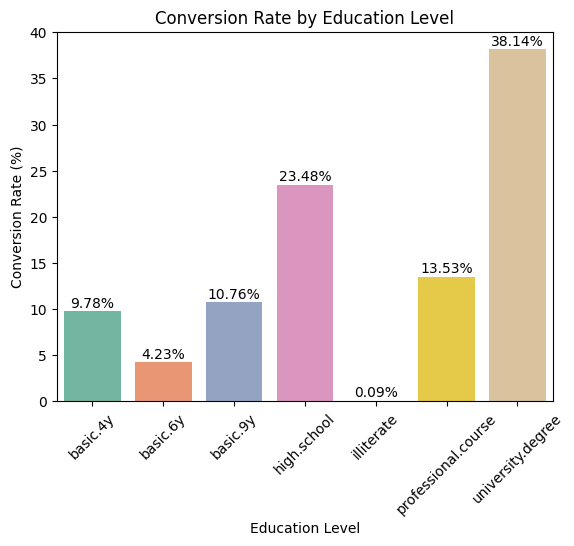

In [20]:
# Gráfico de barras nivel de educación

# Filtrar el DataFrame: 'education' para que no devuelva datos desconocidos y que 'y' sea 'yes'. Lo llamamos con 'aa' que significa el análisis por agrupaciones
df_aa_education = df_m[(df_m['education'] != 'unknown') & (df_m['y'].isin(['yes']))]

# Agrupar los datos por 'education' y contar cuántos 'yes' hay en cada grupo
conversion_rate_education_yes = df_aa_education.groupby('education', observed=False)['y'].count()

# Contar el total de registros por cada grupo de 'education'
total_count_education = conversion_rate_education_yes.sum()

# Convertir a porcentaje para mostrar la tasa de conversión
conversion_rate_education = round((conversion_rate_education_yes/total_count_education) * 100, 2)

# Crear un gráfico de barras
ax = sns.barplot(x=conversion_rate_education.index, y=conversion_rate_education.values, hue=conversion_rate_education.index, palette='Set2', legend=False)

# Agregar los valores de la tasa de conversión sobre las barras
for i, v in enumerate(conversion_rate_education.values):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Conversion Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45) 
plt.show()

In [21]:
# Crear DataFrame tasa_suscripcion_education
tasa_suscripcion_education = pd.DataFrame({
    'Nivel educativo': conversion_rate_education.index,
    'Conteo de suscripciones (yes)': conversion_rate_education_yes.values,
    'Tasa de conversion (%)': conversion_rate_education.values
}).reset_index(drop=True)
tasa_suscripcion_education = tasa_suscripcion_education.sort_values(by='Tasa de conversion (%)', ascending=False).reset_index(drop=True)
tasa_suscripcion_education

,Nivel educativo,Conteo de suscripciones (yes),Tasa de conversion (%)
0,university.degree,1748,38.14
1,high.school,1076,23.48
2,professional.course,620,13.53
3,basic.9y,493,10.76
4,basic.4y,448,9.78
5,basic.6y,194,4.23
6,illiterate,4,0.09


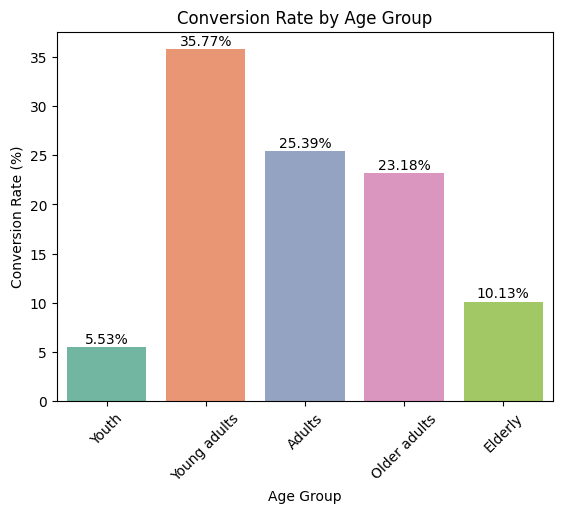

In [22]:
# Gráfico de barras grupo de edad

# Filtrar el DataFrame: 'age' para que no devuelva datos desconocidos y que 'y' sea 'yes'. Lo llamamos con 'aa' que significa el análisis por agrupaciones
df_aa_age = df_m[(df_m['age'] != 0) & (df_m['y'].isin(['yes']))]

# Agrupar los datos por 'age_group' y contar cuántos 'yes' hay en cada grupo
conversion_rate_age_yes = df_aa_age.groupby('age_group', observed=False)['y'].count()

# Contar el total de registros por cada grupo de 'education'
total_count_age = conversion_rate_age_yes.sum()

# Convertir a porcentaje para mostrar la tasa de conversión
conversion_rate_age = round((conversion_rate_age_yes/total_count_age) * 100, 2)

# Crear un gráfico de barras
ax = sns.barplot(x=conversion_rate_age.index, y=conversion_rate_age.values, hue=conversion_rate_age.index, palette='Set2', legend=False)

# Agregar los valores de la tasa de conversión sobre las barras
for i, v in enumerate(conversion_rate_age.values):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Conversion Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45) 
plt.show()

In [23]:
# Crear DataFrame tasa_suscripcion_age
tasa_suscripcion_age = pd.DataFrame({
    'Age Group': conversion_rate_age.index,
    'Conteo de suscripciones (yes)': conversion_rate_age_yes.values,
    'Tasa de conversion (%)': conversion_rate_age.values
}).reset_index(drop=True)
tasa_suscripcion_age = tasa_suscripcion_age.sort_values(by='Tasa de conversion (%)', ascending=False).reset_index(drop=True)
tasa_suscripcion_age

,Age Group,Conteo de suscripciones (yes),Tasa de conversion (%)
0,Young adults,1526,35.77
1,Adults,1083,25.39
2,Older adults,989,23.18
3,Elderly,432,10.13
4,Youth,236,5.53


2. Ingresos y duracion de llamadas

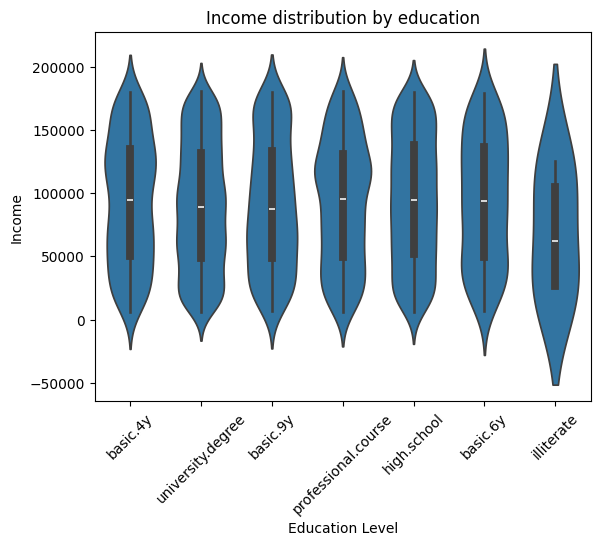

<Figure size 1000x600 with 0 Axes>

In [24]:
# Gráfico violinplot education vs income

# Filtrar el DataFrame: 'education' para que no devuelva datos desconocidos y que 'y' sea 'yes'.
df_edu_in = df_m[(df_m['education'] != 'unknown') & (df_m['y'].isin(['yes']))]

sns.violinplot(x='education', y='Income', data=df_edu_in)
plt.xticks(rotation=45)
plt.title('Income distribution by education')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.figure(figsize=(10, 6))
plt.show()

In [25]:
# Tabla información education e Income
tabla_edu_in = df_edu_in.groupby('education', as_index=False)['Income'].mean()
tabla_edu_in = tabla_edu_in.sort_values(by='Income', ascending=False)
tabla_edu_in.columns = ['Nivel educativo', 'Ingreso promedio']
tabla_edu_in['Ingreso promedio'] = tabla_edu_in['Ingreso promedio'].round(2)
tabla_edu_in = tabla_edu_in.reset_index(drop=True)

# Mostrar como tabla bonita
display(tabla_edu_in)

,Nivel educativo,Ingreso promedio
0,high.school,94561.31
1,basic.4y,94491.34
2,basic.6y,94214.31
3,professional.course,92875.73
4,basic.9y,91386.87
5,university.degree,90444.02
6,illiterate,68982.00


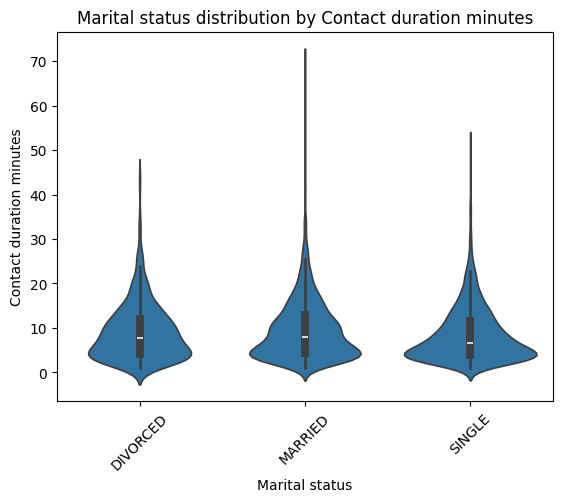

<Figure size 1000x600 with 0 Axes>

In [26]:
# Gráfico violinplot duracion de la llamada por estado civil

# Filtrar el DataFrame: 'education' para que no devuelva datos desconocidos y que 'y' sea 'yes'.
df_mar_contac= df_m[(df_m['marital'] != 'unknown') & (df_m['y'].isin(['yes']))]

sns.violinplot(x='marital', y='contact_duration_minutes', data=df_mar_contac)
plt.xticks(rotation=45)
plt.title('Marital status distribution by Contact duration minutes')
plt.xlabel('Marital status')
plt.ylabel('Contact duration minutes')
plt.figure(figsize=(10, 6))
plt.show()

In [27]:
# Tabla información marital e contact duration minutes
tabla_mar_contact = df_mar_contac.groupby('marital', as_index=False)['contact_duration_minutes'].mean()
tabla_mar_contact = tabla_mar_contact.sort_values(by='contact_duration_minutes', ascending=False)
tabla_mar_contact.columns = ['Estado civil', 'Duracion contacto promedio']
tabla_mar_contact['Duracion contacto promedio'] = tabla_mar_contact['Duracion contacto promedio'].round(2)
tabla_mar_contact = tabla_mar_contact.reset_index(drop=True)

# Mostrar como tabla bonita
display(tabla_mar_contact)

,Estado civil,Duracion contacto promedio
0,MARRIED,9.61
1,DIVORCED,9.18
2,SINGLE,8.52


3. Tasa de converión por profesión y por método de contacto

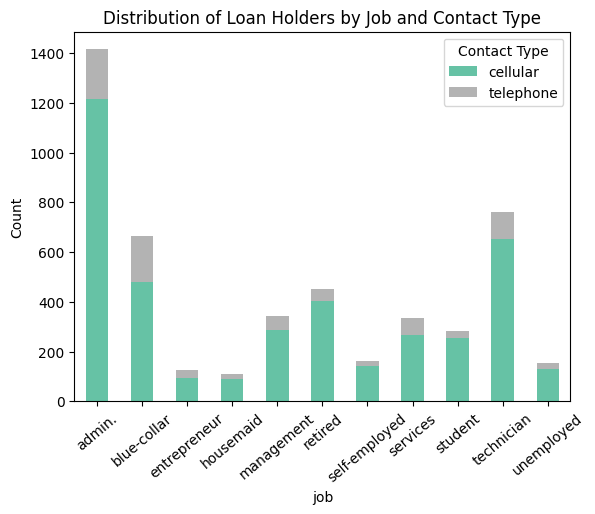

In [28]:
# Stacked barplot: por profesión

# Filtrar el DataFrame: 'job' para que no devuelva datos desconocidos y que 'y' sea 'yes'.
df_job_y= df_m[(df_m['job'] != 'unknown') & (df_m['job'] != 'contact') & (df_m['y'].isin(['yes']))]

# Agrupar por job y contact
df_gb = df_job_y.groupby(['job', 'contact']).size().unstack(fill_value=0)

# Graficar apilado
df_gb.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Distribution of Loan Holders by Job and Contact Type')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.legend(title='Contact Type')
plt.show()

In [29]:
# Crear tabla cruzada
tabla_job_cont = pd.crosstab(df_job_y['job'], df_job_y['contact'])
# Eliminar el nombre del índice de columnas y filas
tabla_job_cont.columns.name = None
tabla_job_cont.index.name = None
#Ordenamos la tabla
tabla_job_cont = tabla_job_cont.sort_values(by='cellular', ascending=False)
# Mostrar tabla
print(tabla_job_cont)

               cellular  telephone
admin.             1216        199
technician          653        109
blue-collar         479        186
retired             404         47
management          286         56
services            266         70
student             253         30
self-employed       142         19
unemployed          131         22
entrepreneur         92         34
housemaid            89         22


# **Analisis Temporal**

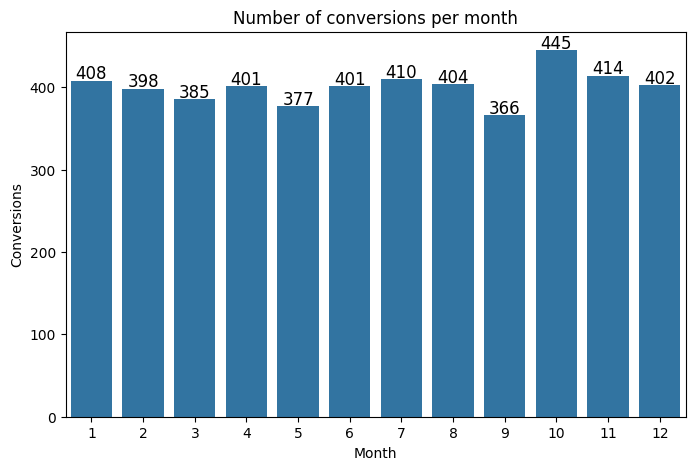

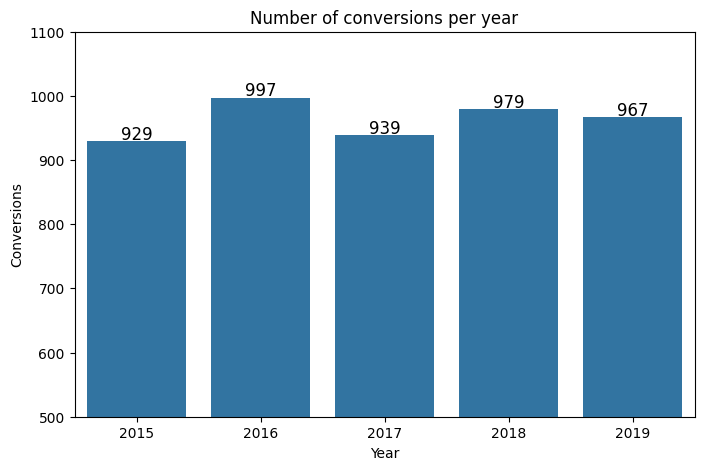

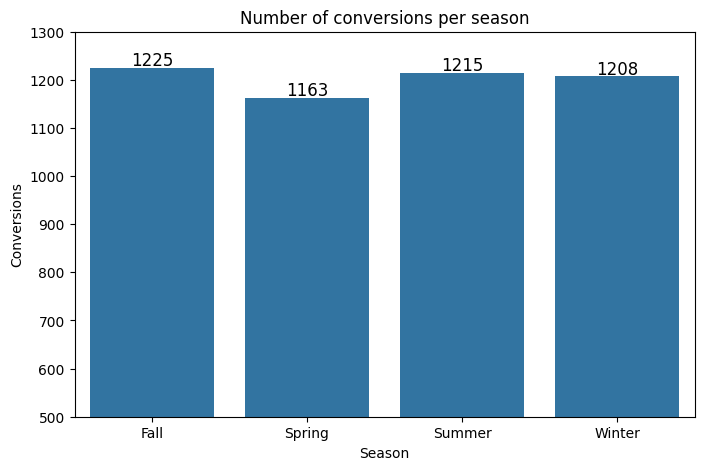

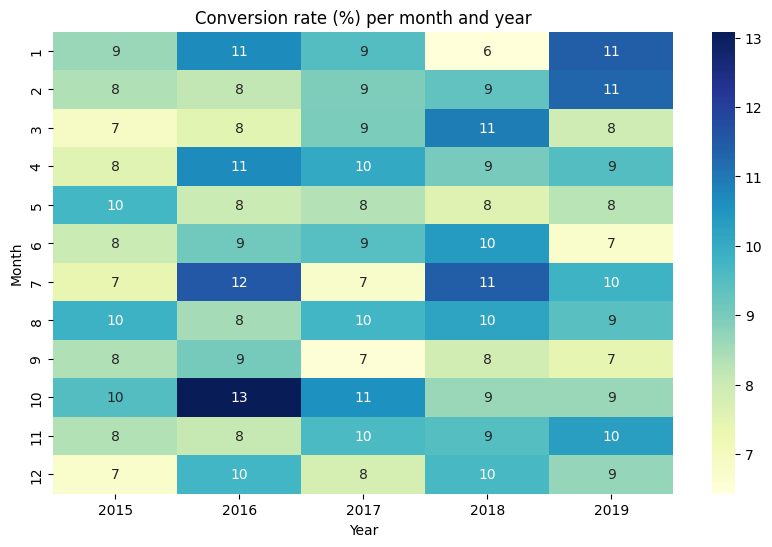

In [30]:
# Calcular la tasa de conversión por mes, año y estación

# Filtrar solo las conversiones
df_con_m_y = df_m[(df_m['y'] == 'yes') & (df_m['year'] != 0) & (df_m['month'] != 'unKnown')]

# 1. Conteo de conversiones por mes
conv_month = df_con_m_y['month'].value_counts().sort_index().reset_index()
conv_month.columns = ['month', 'conversions']

# 2. Conteo por año
conv_year = df_con_m_y['year'].value_counts().sort_index().reset_index()
conv_year.columns = ['year', 'conversions']

# 3. Conteo por estación
conv_season = df_con_m_y['season'].value_counts().sort_index().reset_index()
conv_season.columns = ['season', 'conversions']

# 4. Heatmap: llamadas por mes y año (usamos todo el df, no solo los "yes")
# Filtrar antes del pivot
df_pivot = df_m[df_m['year'] != 0]
calls_pivot = df_pivot.pivot_table(index='month', columns='year', values='campaign', aggfunc='sum')
calls_pivot_yes = df_con_m_y.pivot_table(index='month', columns='year', values='campaign', aggfunc='sum')
conversion_rate_pivot = (calls_pivot_yes / calls_pivot) * 100
month_order = list(range(1, 13))  # [1, 2, ..., 12]
conversion_rate_pivot = conversion_rate_pivot.reindex(index=month_order)

# --- Gráficos ---

# Lineplot conversiones por mes
plt.figure(figsize=(8,5))
ax = sns.barplot(data=conv_month, x='month', y='conversions')

# Añadir los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.title('Number of conversions per month')
plt.ylabel('Conversions')
plt.xlabel('Month')
plt.grid(False)
plt.show()

# Lineplot conversiones por año
plt.figure(figsize=(8,5))
ax = sns.barplot(data=conv_year, x='year', y='conversions')

# Añadir los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.title('Number of conversions per year')
plt.ylabel('Conversions')
plt.xlabel('Year')
plt.ylim(500, 1100)  # El eje Y comienza en 500 y termina en 1100
plt.grid(False)
plt.show()

# Barras por estación
plt.figure(figsize=(8,5))
ax = sns.barplot(data=conv_season, x='season', y='conversions')

# Añadir los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.title('Number of conversions per season')
plt.ylabel('Conversions')
plt.xlabel('Season')
plt.ylim(500, 1300)  # El eje Y comienza en 500 y termina en 1300
plt.grid(False)
plt.show()

# Heatmap de llamadas por mes y año
plt.figure(figsize=(10,6))
sns.heatmap(conversion_rate_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Conversion rate (%) per month and year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# **Correlaciones y Relaciones**

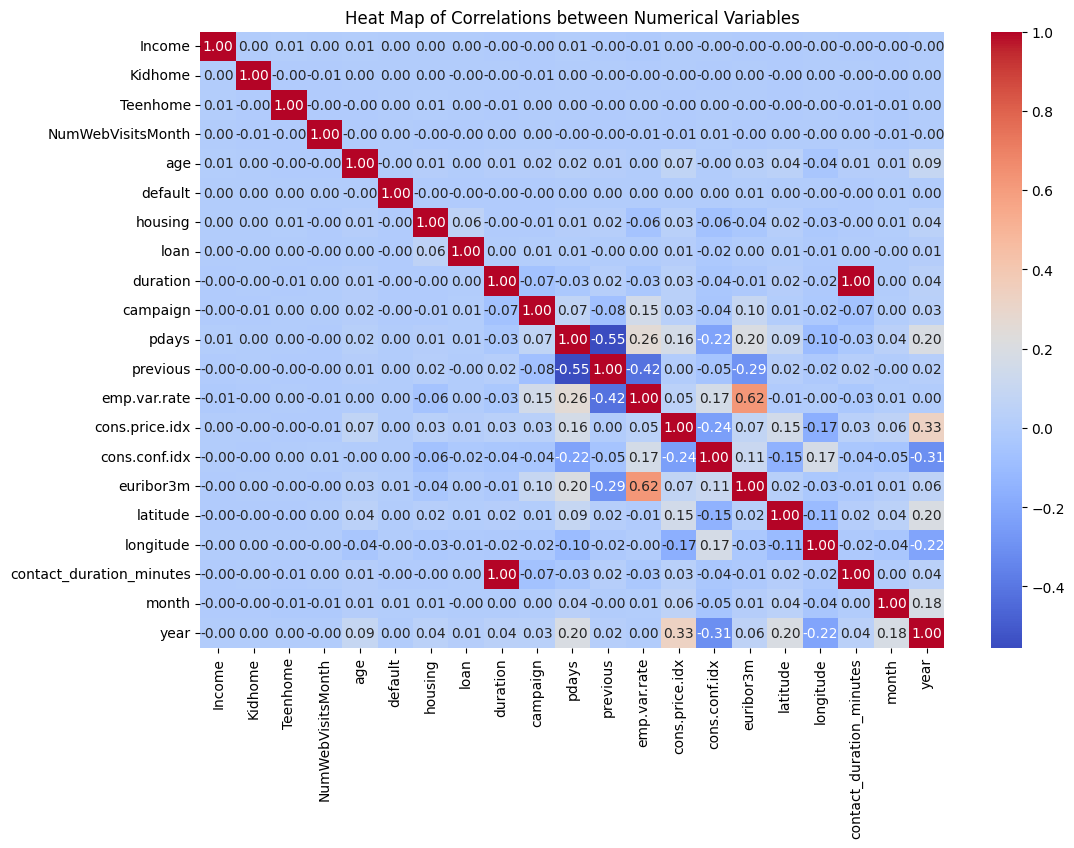

In [31]:
# Filtrar solo las columnas numéricas del DataFrame
df_numeric = df_m.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Graficar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heat Map of Correlations between Numerical Variables')
plt.show()

# **Visualizaciones Efectivas**

1. Gráfico de Barras – Conversión por Edad y Educación

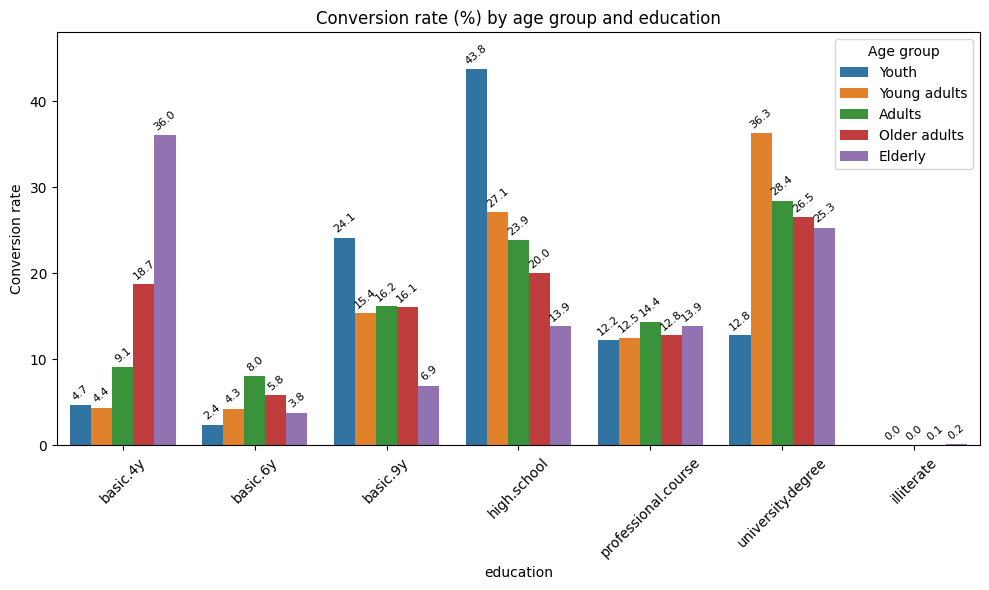

In [32]:
# Visualiza cómo varía la tasa de conversión combinando edad y nivel educativo

# Filtra datos válidos 
df_ve_age_edu = df_m[(df_m['age'] != 0) & (df_m['education'] != 'unknown') & (df_m['y'] != 'yes')].copy()  # <- agrega .copy()

# Agrupa y calcula la tasa de conversión
conversion_counts = df_ve_age_edu.groupby(['age_group', 'education'], observed=True).size().reset_index(name='conversion_count')

# Aquí mostramos la tabla con los valores de la tasa de conversión.
total_conversions_by_age = df_ve_age_edu.groupby('age_group', observed=True)['y'].count().reset_index()
total_conversions_by_age.rename(columns={'y': 'total_conversions'}, inplace=True)

# Unir la tasa de conversiones por grupo de edad y educación con el total de conversiones por edad
conversion_rates = pd.merge(conversion_counts, total_conversions_by_age, on='age_group')

# Calcular la tasa de conversión como un porcentaje
conversion_rates['conversion_rate'] = (conversion_rates['conversion_count'] / conversion_rates['total_conversions']) * 100

# Mostrar gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=conversion_rates, x='education', y='conversion_rate', hue='age_group')
# Añadir texto encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', rotation=40, fontsize=8, padding=2)

plt.xticks(rotation=45)
plt.ylabel('Conversion rate')
plt.title('Conversion rate (%) by age group and education')
plt.legend(title='Age group', loc='upper right')
plt.ylim(0, 48)  # El eje Y comienza en 0 y termina en 48
plt.tight_layout()
plt.show()

2. Línea Temporal – Evolución de la Conversión

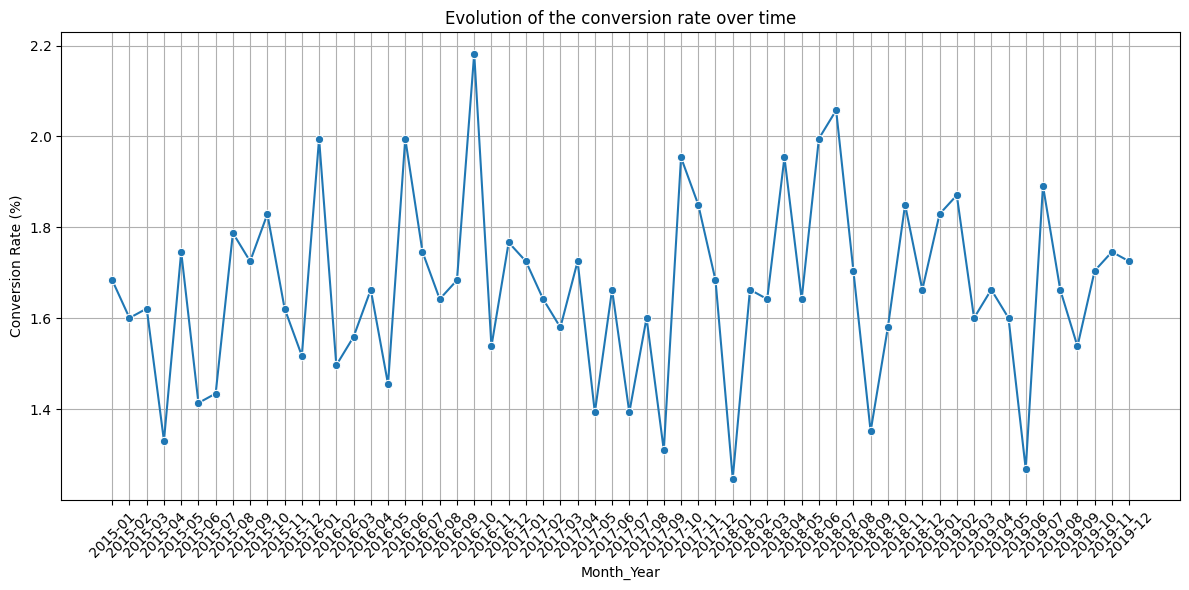

In [33]:
# Línea de evolución mensual de la tasa de conversión

# Filtra datos válidos 
df_ve_my= df_m[(df_m['month_year'] != 'unknown') & (df_m['y'] == 'yes')]

# Contamos las conversiones por año-mes
conversiones_exitosas = df_ve_my.groupby('month_year').size()

# Contamos todos los registros
total_registros = df_ve_my.shape[0] 

# Calculamos la tasa de conversión (conversiones exitosas / total registros)
conversion_rate = (conversiones_exitosas / total_registros) * 100

# Convertimos el resultado a un DataFrame para facilitar la visualización
conversion_rate_df = conversion_rate.reset_index(name='conversion_rate')

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=conversion_rate_df, x='month_year', y='conversion_rate', marker='o')
plt.title('Evolution of the conversion rate over time')
plt.xlabel('Month_Year')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

3. Gráfico Circular – Métodos de Contacto

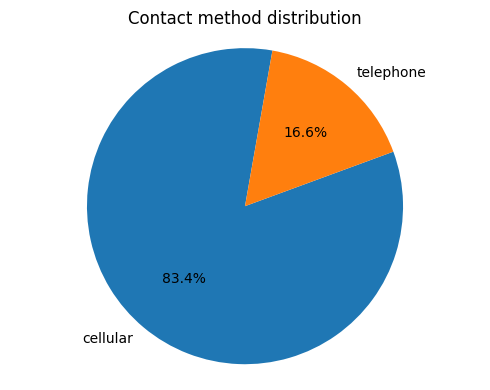

In [34]:
# Gráfico circular para mostrar la proporción de cada método de contacto
# Filtra datos válidos 
df_ve_cont= df_m[df_m['y'] == 'yes']
contact_counts = df_ve_cont['contact'].value_counts()

plt.figure(figsize=(5, 4))
plt.pie(
    contact_counts,
    labels=contact_counts.index,
    autopct='%1.1f%%',
    startangle=80
)
plt.title('Contact method distribution')
plt.axis('equal')  # Asegura que el círculo tenga forma perfecta
plt.tight_layout()
plt.show()

4. Gráfico de barras – Ingreso por Educación

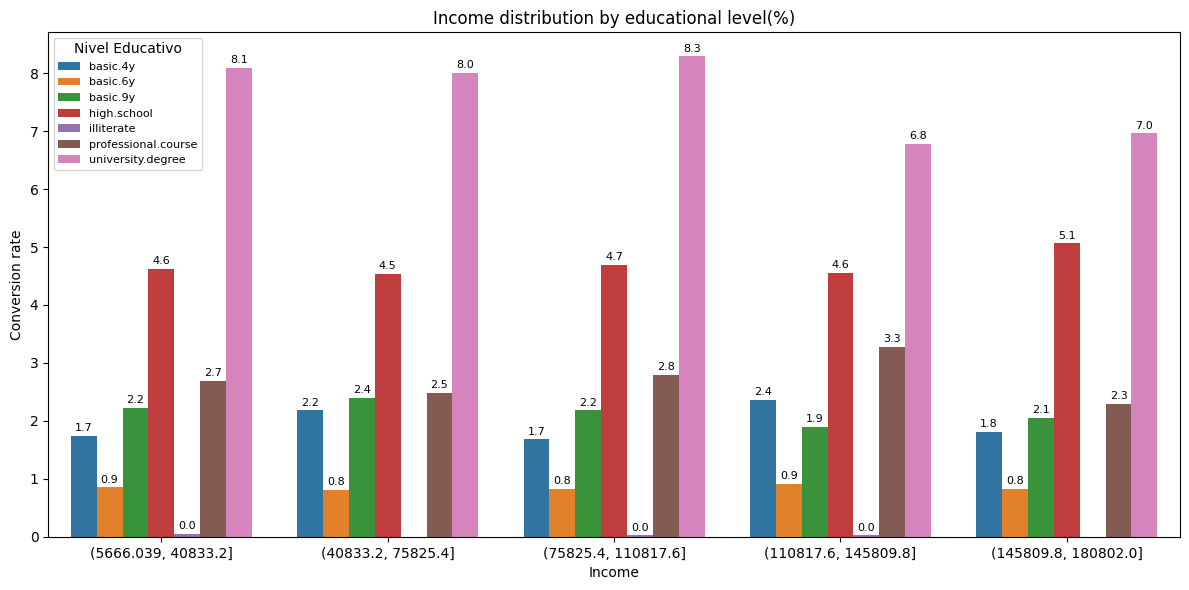

In [35]:
# Filtrar solo clientes suscritos
df_gb_in_edu = df_m[(df_m['y'] == 'yes') & (df_m['education'] != 'unknown')].copy()

# Total por grupo
total_gb_in_edu = df_gb_in_edu.shape[0] 

# Total de "yes" por grupo
yes_gb_in_edu = df_gb_in_edu.groupby(['education', 'income_bin'], observed=True).size()

# Calcular tasa de conversión
cr_gb_in_edu = (yes_gb_in_edu / total_gb_in_edu * 100).reset_index(name='conversion_rate')

# Histograma combinado de ingresos por nivel educativo 
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=cr_gb_in_edu, x='income_bin', y='conversion_rate', hue='education')
# Añadir texto encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=2)
plt.title('Income distribution by educational level(%)')
plt.xlabel('Income')
plt.ylabel('Conversion rate')
# Ajustar el tamaño de la leyenda
plt.legend(title='Nivel Educativo', fontsize=8)
plt.tight_layout()
plt.show()

5. Gráfico de Barras – Profesión vs Tasa de Conversión

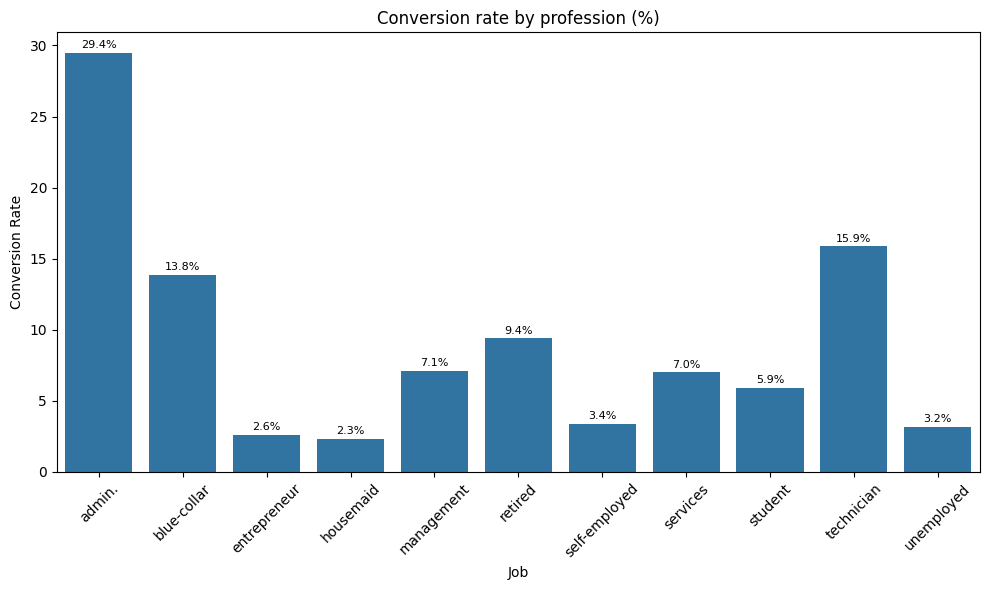

In [36]:
# Filtrar los datos para recoger solo los clientes suscritos y con trabajo conocido
df_gb_job_y = df_m[(df_m['y'] == 'yes') & (df_m['job'] != 'unknown')]

# # Total por grupo
total_gb_job_y = df_gb_job_y.shape[0] 

# Total de "yes" por grupo
yes_gb_job_y = df_gb_job_y.groupby('job', observed=True).size()

# Calcular tasa de conversión
cr_gb_job_y = (yes_gb_job_y / total_gb_job_y * 100).reset_index(name='conversion_rate')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cr_gb_job_y, x='job', y='conversion_rate')
# Añadir texto encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=8, padding=2)
plt.xticks(rotation=45)
plt.title('Conversion rate by profession (%)')
plt.xlabel('Job')
plt.ylabel('Conversion Rate')
plt.tight_layout()
plt.show()